# Análise de Sentimentos no Twitter - Social Media Analytics

Este é um projeto de Processamento de Linguagem Natural (PLN).

## 1. Entendimento do Negócio

A Análise de Sentimentos é um campo dentro do Processamento de Linguagem Natural que constrói sistemas que identificam e extraem opiniões dentro de textos. Normalmente, além de identificar a opinião, esses sistemas extraem atributos da expressão, como:

- Assunto: o que está sendo falado.
- Detentor da opinião: quem é a pessoa ou entidade que expressa a opinião.
- Polaridade: se a opinião expressa é positiva ou negativa.

Essa técnica está em constante desenvolvimento por possuir muitas aplicações práticas, como por exemplo: 

- Pesquisas de mercado para captar a emoção apresentada pelo público em relação a um determinado tema.
- Atendimento personalizado ao cliente de acordo com os sentimentos apresentados.
- Estratégias de Marketing baseadas nos perfis dos clientes.


A Análise de Sentimentos transforma informações não-estruturadas em dados estruturados, podendo conter opiniões públicas sobre produtos, serviços, marcas, política ou qualquer outro tópico que seja relevante para a análise da empresa.

### 1.1 Problema do Negócio

Imagine uma empresa que quer saber sobre a repercussão de uma campanha de marketing que foi lançada no mercado. É possível usar as redes sociais para buscar informações, mas como saber se estão falando bem ou mal dessa campanha? Ler, entender e tirar uma conclusão de milhares de comentários de usuários pode ser uma tarefa inviável.

É nesse cenário que o objetivo desse projeto se enquadra. Iremos desenvolver um modelo de aprendizado de máquina capaz de classificar tweets sobre um determinado tema em positivo ou negativo. Aqui, não iremos avaliar nenhuma campanha, produto ou serviço de uma empresa específica, em vez disso, utilizaremos tweets relacionados a Black Friday, um tema mais "genérico" que não irá expor nenhuma empresa.

O grande desafio desse projeto se dá porque não existe um conjunto de dados de tweets pré-etiquetados para treinar o modelo, então, para a fase de treinamento utilizaremos outros dados de contexto parecido, o de avaliações do grupo B2W Digital. Este grupo é responsável pelas lojas Submarino, Shoptime e Americanas.

Outro desafio desse projeto é em relação a linguagem das mensagens publicadas no Twitter que, em geral, contém gírias, irônias, e caracteres especiais, então, teremos de realizar o pré-processamento nesses dados, para que o modelo consiga classificar textos que "nunca viu antes" de forma satisfatória. Para isso, será utilizado o algorítimo *Multinomial Naive Bayes*, que é um modelo probabilístico baseado na frequência de um termo e excelente para classificação de documentos.

### 1.2 Dicionário de Dados

Como descrito acima, iremos utilizar o conjunto de dados do grupo B2W Digital para o treinamento do modelo. 

Esse conjunto está dividido em dois arquivos, "train.csv" e "test.csv", porém, vamos utilizar apenas o conjunto de treino, que possui as avaliações dos consumidores. Os dados podem ser baixados <a href='https://www.kaggle.com/c/i2a2-nlp-2021-sentiment-analysis/data'>neste link</a>, e contém os seguintes atributos: 

* **`submission_date`**: data de envio da avaliação.
* **`review_title`**: título da avaliação.
* **`review_text`**: texto principal da avaliação.
* **`reviewer_id`**: código de identificação do avaliador.
* **`reviewer_birth_year`**: data de nascimento do avaliador.
* **`reviewer_gender`**: gênero do avaliador:
    - M = masculino. 
    - F = feminino.
* **`reviewer_state`**: UF do estado do avaliador.
* **`product_id`**: código de identificação do produto.
* **`product_name`**: nome do produto.
* **`product_brand`**: marca do produto.
* **`site_category_lv1`**: categoria do produto.
* **`site_category_lv2`**: categoria do produto (segundo nível).
* **`rating`**: nota atribuída a avaliação, de 1 a 5.

### 1.3 Estratégia da Solução

Como estratégia para a solução do projeto, definimos as seguintes etapas:

- **1. Entendimento do Negócio**: nessa etapa inicial, realizamos uma breve introdução sobre o tema do projeto e definimos nossos objetivos.


- **2. Entendimento dos Dados**: nessa etapa, definimos o conjunto de dados que iremos utilizar e realizamos um tratamento a fim de verificar possíveis inconsistências nos dados. 


- **3. Pré-Processamento dos Dados**: o principal objetivo nessa etapa é realizar a preparação dos dados para a modelagem. Entre as práticas abordadas nessa sessão estão: balanceamento de classes, limpeza dos dados, lematização e transformação dos dados em vetores numéricos.


- **4. Modelagem Preditiva**: aqui, iremos criar o modelo preditivo utilizando o algoritmo *Naive Bayes*. Como métricas de avaliação, verificaremos a acurácia, *recall*, *F1 Score* e também a matriz de confusão.  


- **5. Similaridade de Dados**: esta etapa foi inserida como uma análise adicional que tem como objetivo verificar as similaridades entre as palavras mais frequentes. Para a realização dessa tarefa utilizamos o algoritmo *Word2Vec*.


- **6. Classificando Tweets**: esta etapa se refere ao objetivo principal do projeto. Com o modelo treinado, iremos realizar a coleta de uma nova base de dados diretamente do Twitter, utilizando a própria API da rede social. Após isso, iremos apresentar esses dados ao modelo preditivo para analisarmos a sua performance.


- **7. Considerações Finais**: por fim, aqui, iremos deixar nossas conclusões finais do projeto. 

## 2. Entendimento dos Dados

Vamos iniciar o projeto carregando as bibliotecas e a base de dados.

### 2.1 Bibliotecas Necessárias

In [1]:
# Filtragem das mensagens de avisos.
import warnings
warnings.filterwarnings('ignore') 

# Manipulação de dados.
import numpy as np
import pandas as pd

# Criação de gráficos.
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento dos dados.
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from unidecode import unidecode

# Divisão dos dados.
from sklearn.model_selection import train_test_split

# Algoritmos de Machine Learning.
from gensim.models import Word2Vec
from gensim.models.phrases import Phraser, Phrases
from sklearn.naive_bayes import MultinomialNB

# API Twitter.
import toml
import tweepy as tw

# Métricas para avaliação do modelo.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Bibliotecas carregadas com sucesso!')

Bibliotecas carregadas com sucesso!


In [2]:
# Versão da linguagem Python.
from platform import python_version
print('Versão da linguagem Python:', python_version())

Versão da linguagem Python: 3.7.3


In [3]:
# Versão dos pacotes.
%reload_ext watermark
%watermark --iversions

numpy     : 1.21.5
pandas    : 1.3.5
matplotlib: 3.5.1
spacy     : 3.2.3
toml      : 0.10.2
tweepy    : 4.8.0
seaborn   : 0.11.2
re        : 2.2.1



In [4]:
# Configuração do notebook.

# Plotagens.
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['lines.linewidth'] = 3

# Estilo dos gráficos.
plt.style.use('ggplot')

# Configuração Dataframe.
pd.set_option('max_colwidth', 400)

### 2.2 Tratamento Inicial dos Dados

Nessa primeira análise, nosso objetivo é tratar possíveis inconsistências nos dados.

Conforme explicado na sessão "Problema de Negócio", utilizaremos apenas o conjunto "train.csv" como base para esse projeto.

Selecionaremos apenas 2 colunas: o texto e a nota da avaliação dos usuários.

In [5]:
# Carregando o conjunto de dados.
aux1 = pd.read_csv('train.csv')

# Selecionando as variáveis.
df = aux1[['review_text', 'rating']]

Criar uma cópia do dataset é uma boa prática para não perdermos o conteúdo original durante a manipulação dos dados.

In [6]:
# Cópia do dataset.
df1 = df

In [7]:
# Informações do dataframe.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92661 entries, 0 to 92660
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  92661 non-null  object
 1   rating       92661 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


Esses são os dados que iremos utilizar para o treinamento do modelo.

Vejamos se temos registros ausentes ou duplicados.

In [8]:
# Registros ausentes.
df1.isnull().sum()

review_text    0
rating         0
dtype: int64

In [9]:
# Registros duplicados.
df1.duplicated(keep = False).sum()

2308

Não há valores ausentes, porém temos alguns valores duplicados, vamos excluí-los.

In [10]:
# Excluíndo registros duplicados.
df1 = df1.drop_duplicates().reset_index(drop = True)

In [11]:
# Dimensão do dataframe.
df1.shape

(91290, 2)

In [12]:
# Visualizando o dataframe.
df1.head()

,review_text,rating
0,Comprei um TV Box dia 14 /12/ 2017 e ate agora as americanas não Devovel o meu dinheiro. Ja Fiz de tudo pre entrar em contato com essa empresa mas os fones que sao disponiveis por ela nao existem. pre mim isso se chama CALOTE.,1
1,"Considerando seu custo, é ótimo som com muita qualidade.",4
2,"Simplesmente é a melhor que já vi... ela é linda, grande, fácil de montar e praticamente ela se autoconfigura sozinha. Parece que vc está no computador. O som é ótimo e a definição de imagem me deixou apaixonada. A entrega foi muito rápida e gostei muito da presteza e agilidade da transportadora Plimor. Pude acompanhar cada passo da entrega. Parabéns!",5
3,Estou muito satisfeita com o produto é a entrega no prazo.,4
4,"A gaiola é muito bonita. Colorida e grande. Algumas grades ficaram meio soltas,mas ainda valeu a pena.",3


Essa é a base de dados que iremos utilizar nesse projeto.

Agora, temos que pré-processar esses dados.

## 3. Pré-Processamento dos Dados

Nessa etapa, iremos preparar os dados para a etapa de modelagem preditiva.

Vamos iniciar pela variável **`rating`**.

In [13]:
# Contagem de registros.
df1['rating'].value_counts()

5    33033
4    22492
1    18579
3    11332
2     5854
Name: rating, dtype: int64

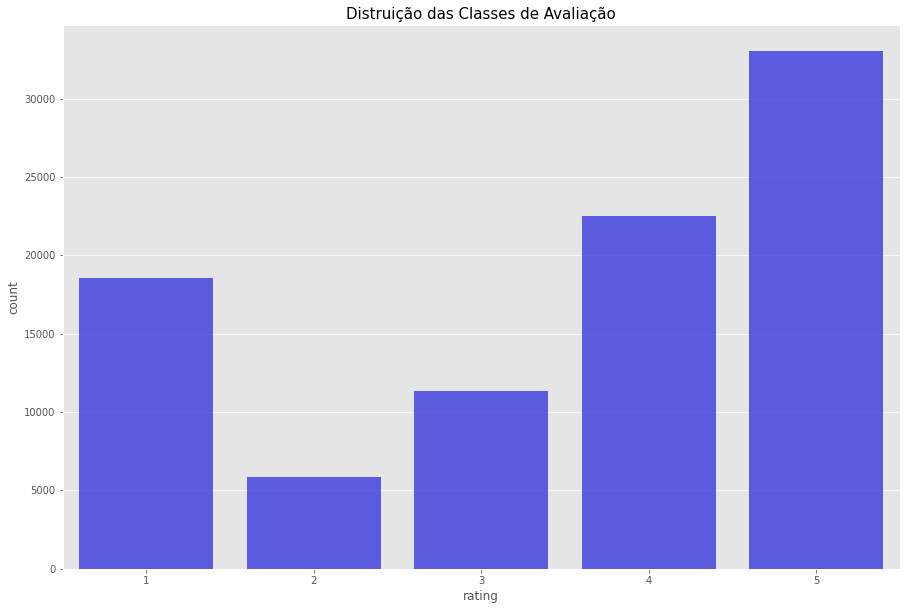

In [14]:
# Variável rating.
p1 = sns.countplot(x = 'rating', 
                   color = 'blue', 
                   alpha = 0.7,
                   data = df1)
p1.set_title('Distruição das Classes de Avaliação', size = 15);

Como vimos, essa variável possui 5 classes que se referem as notas das avaliações dos usuários.

### 3.1 Balanceamento de Classes

Com base na plotagem acima, fica claro que as classes dessa variável estão desbalanceadas. 

Como nosso objetivo é classificar tweets da BlackFriday em positivos ou negativos, precisamos treinar um modelo com um conjunto que possua esses rótulos e que esteja balanceado.

Nesse sentido, vamos separar as classes dessa variável da seguinte forma:

- Avaliações com valores 1 e 2 serão consideradas negativas.
- Avaliações com valor 5 serão consideradas positivas. 

Após essa separação, selecionaremos 20.000 amostras de cada conjunto, resultando em um *corpus* igualmente distribuído.

O *corpus* nada mais é que o conjunto de textos que utilizaremos como base para o treinamento.

In [15]:
# Separando as amostras.

# Amostras positivas.
pos = df1[['review_text', 'rating']][df1['rating'] == 5]

# Amostras negativas.
neg = df1[['review_text', 'rating']][df1['rating'] <= 2]

# Concatenando as amostras em um novo objeto.
df_aux = pd.concat([pos, neg])

In [16]:
# Visualizando o dataframe.
df_aux.head()

,review_text,rating
2,"Simplesmente é a melhor que já vi... ela é linda, grande, fácil de montar e praticamente ela se autoconfigura sozinha. Parece que vc está no computador. O som é ótimo e a definição de imagem me deixou apaixonada. A entrega foi muito rápida e gostei muito da presteza e agilidade da transportadora Plimor. Pude acompanhar cada passo da entrega. Parabéns!",5
5,produto com qualidade original hp. a multifuncional reconheceu sem problema,5
10,"Com esse valor promocional, eu coloquei minha moto a venda pra adquirir essa chave... Pois pelo valor ela deve q trabalha sózinha, só no comando de voz.",5
11,"Chegou bem antes do prazo, é nota 10 o aparelho!!!!",5
16,"Tudo perfeito, um excelente smartfone é um ótimo custo beneficio!",5


O dataframe acima, possui apenas as amostras com avaliações 1, 2 e 5.

Vamos atribuir o label "Positivo" e "Negativo" de acordo com as avaliações dos usuários. 

In [17]:
# Dicionário de valores.
maping = {5:'Positivo', 
          2:'Negativo', 
          1:'Negativo'}

# Atribuindo os labels.
df_aux = df_aux.replace(maping)

In [18]:
# Visualizando o dataframe.
df_aux.head()

,review_text,rating
2,"Simplesmente é a melhor que já vi... ela é linda, grande, fácil de montar e praticamente ela se autoconfigura sozinha. Parece que vc está no computador. O som é ótimo e a definição de imagem me deixou apaixonada. A entrega foi muito rápida e gostei muito da presteza e agilidade da transportadora Plimor. Pude acompanhar cada passo da entrega. Parabéns!",Positivo
5,produto com qualidade original hp. a multifuncional reconheceu sem problema,Positivo
10,"Com esse valor promocional, eu coloquei minha moto a venda pra adquirir essa chave... Pois pelo valor ela deve q trabalha sózinha, só no comando de voz.",Positivo
11,"Chegou bem antes do prazo, é nota 10 o aparelho!!!!",Positivo
16,"Tudo perfeito, um excelente smartfone é um ótimo custo beneficio!",Positivo


Vamos selecionar randomicamente as amostras para cada classe. 

In [19]:
# Definindo um "seed".
np.random.seed(seed = 100)

# Selecionando as amostras.
pos = np.random.choice(df_aux['review_text'][df_aux['rating'] == 'Positivo'], 19999, replace = False)
neg = np.random.choice(df_aux['review_text'][df_aux['rating'] == 'Negativo'], 20000, replace = False)

# Amostras selecionadas.
select = np.concatenate([pos, neg])

Acima, utilizamos a função *random.choice* para selecionar as amostras randômicas de cada classe. 

Observe que específicamos o parâmetro *replace = False*, para que o mesmo registro não seja selecionado mais de uma vez no mesmo conjunto.

Após a divisão, concatenamos os dois objetos criando um novo array, que utilizaremos para filtrar o dataframe.

In [20]:
# Novo dataframe com registros balanceados. 
df2 = df_aux[df_aux['review_text'].isin(select)].reset_index(drop = True)

In [21]:
# Contagem de registros.
df2['rating'].value_counts()

Positivo    20000
Negativo    20000
Name: rating, dtype: int64

Como podemos ver na saída acima, as classes estão balanceadas.

### 3.2 Limpeza dos Dados

Agora, vamos tratar a variável **`review_text`**. 

Iremos denifir nossas próprias funções para realizar o pré-processamento dos textos da variável.

Teremos como objetivo: 

- Remover palavras irrelevantes e acentuações.
- Substituir letras maíusculas por minúsculas.
- Aplicar a lematização.
- Converter textos para vetores numéricos.

In [22]:
# Definindo a classe.

# Carregando o pipeline em português.
nlp = spacy.load('pt_core_news_sm')

# Criando a classe.
class DataPrep:
    
    # Função para remover acentos e cedilha.    
    def rm_accents(self, texto) -> list:
        fixed = list()
        for linha in texto:
            unidecoded_text = unidecode(linha)
            fixed.append(unidecoded_text)
        return fixed
    
    # Definindo a função de stopwords.    
    def remove_stopwords(self, texto):
        stop_words = [word for word in nlp.Defaults.stop_words]
        remover = ['lojas', 'americanas', 'americana', 'submarino', 'shoptime']
        stop_words.extend(remover)
        texto_limpo = " ".join([i for i in texto if i not in set(stop_words)])
        return texto_limpo
    
    # Função para aplicar a limpeza no corpus (remove stopwords, acentos e letras maíusculas).
    def clean_text(self, texto):
        df_corpus = []
        for i in range(len(texto)):
            df_c = re.sub('[^A-Za-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ]', ' ', texto[i]).lower().split()
            df_corpus.append(df_c)
        df_corpus = pd.Series(df_corpus).apply(lambda x: ' '.join([w for w in x if len(w) > 2]))
        corpus = [self.remove_stopwords(r.split()) for r in df_corpus]
        return corpus
    
    # Funções para aplicar a lematização.
    def lemmatization(self, texto):
        global nlp        
        output = []
        for sent in texto:
            doc = nlp(" ".join(sent)) 
            output.append([token.lemma_ for token in doc])
        return output
    
    def lemmatize(self, texto):
        token = self.lemmatization(pd.Series(self.clean_text(texto)).apply(lambda x: x.split()))
        token_lemma = []
        for i in range(len(token)):
            token_lemma.append(' '.join(token[i]))
        return token_lemma

Com as funções definidas, podemos testá-las. 

Vamos visualizar uma amostra dos dados antes de realizar o tratamento.

In [23]:
# Dados antes do tratamento.
df2[['review_text']].head()

,review_text
0,produto com qualidade original hp. a multifuncional reconheceu sem problema
1,"Com esse valor promocional, eu coloquei minha moto a venda pra adquirir essa chave... Pois pelo valor ela deve q trabalha sózinha, só no comando de voz."
2,"Chegou bem antes do prazo, é nota 10 o aparelho!!!!"
3,"Tudo perfeito, um excelente smartfone é um ótimo custo beneficio!"
4,"O celular e otimo, a camera e excelente, muita memoria. A entrega da Aamericanas foi maravilhosa e o melhor custo beneficio, pesquisei muito o preço e o melhor preço foi daqui. Recomendo."


Observe que na amostra acima, os textos possuem acentos, pontos, vírgulas, cês-cedilhas, e letras maíusculas.

Com as funções que definimos devemos resolver esses problemas.

In [24]:
# Instanciando a classe.
dp = DataPrep()

In [25]:
# Removendo acentos e cedilhas.
df2['review_text'] = dp.rm_accents(df2['review_text'])

In [26]:
# Removendo stopwords e letras maíusculas.
df2['review_text'] = dp.clean_text(df2['review_text'])

In [27]:
# Dados após do tratamento.
df2[['review_text']].head()

,review_text
0,produto qualidade original multifuncional reconheceu problema
1,promocional coloquei moto venda pra adquirir chave trabalha sozinha comando voz
2,chegou prazo nota aparelho
3,perfeito excelente smartfone otimo custo beneficio
4,celular otimo camera excelente muita memoria entrega aamericanas maravilhosa melhor custo beneficio pesquisei preco melhor preco daqui recomendo


Nossas funções funcionaram como esperado!

Podemos partir para a lematização.

#### 3.2.1 Lematização

A lematização diz respeito ao processo de agrupar as formas flexionadas de uma palavra para que possam ser analisadas como um único item, identificado pelo "lema" da palavra. 

Por exemplo, as palavras “gato”, “gata”, “gatos” e “gatas” são todas formas do mesmo lema: “gato”. 

Igualmente, as palavras “tiver”, “tenho”, “tinha”, “tem” são formas do mesmo lema: “ter”. 

A vantagem de aplicar a lematização é clara: redução de vocabulário e abstração de significado.

Existem pacotes com funções prontas para realizar a lematização, mas aqui, vamos utilizar a função que definimos na classe *DataPrep*. 

Iremos salvar o resultado desse tratamento na variável *corpus*.

In [28]:
# Aplicando a lematização.
corpus = dp.lemmatize(df2['review_text'])

#### 3.2.2 Conversão dos Textos para Vetores Numéricos

Para realizar essa tarefa, iremos utilizar uma técnica chamada TF-IDF.

TF-IDF de forma traduzida, significa "Frequência do Termo - Frequência Inversa de Documentos".

Sabemos que os computadores "entendem" apenas dados numéricos, então, por esse motivo, vetorizamos todo o texto para que o computador possa compreendê-lo.

Geralmente calculamos um peso para cada palavra, e esse peso significa a importância da palavra dentro do corpus.

Para essa tarefa, utilizaremos a classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>*TfidfVectorizer()*</a> presente no Scikit-Learn e definiremos alguns hiperparâmetros: 

- **min_df**: desconsidera termos que aparecem menos que "X" vezes.
- **max_df**: usado para excluir termos que são muito frequentes e que provavelmente não ajudarão na previsão do modelo.
- **ngram_range**: define o intervalo de valor desejado (unigramas, bigramas, trigramas, n-grama).
- **max_features**: número de termos mais frequentes para se considerar.

In [29]:
# Instanciando o objeto.
vectorizer = TfidfVectorizer(min_df = 2, 
                             max_df = 0.75,
                             ngram_range = (1,1), 
                             max_features = 15000)

In [30]:
# Aplicando a transformação.
X = vectorizer.fit_transform(corpus).toarray()
y = df2.iloc[:,-1].values

print('X shape: ', X.shape, '\ny shape: ', y.shape)

X shape:  (40000, 8549) 
y shape:  (40000,)


## 4. Modelagem Preditiva

Com os dados devidamente pré-processados, podemos dar inicio a etapa de modelagem preditiva. 

Como dito no início do projeto, iremos utilizar o algoritmo *Naive Bayes*, muito popular para problemas de classificação de textos.

Em meu blog de estudos, há um artigo explicando detalhadamente como esse algoritmo funciona, basta acessar <a href='https://medium.com/@rafaelfelippe_/modelo-bayesiano-naive-bayes-50353ade5984'>este link</a>.

Iniciaremos essa etapa, separando os dados em conjuntos de treino e teste.

In [31]:
# Divisão treino/teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [32]:
# Dimensão dos conjuntos.
print('Registros de Treino: {}'.format(len(X_train)))
print('Registros de Teste: {}'.format(len(X_test)))

Registros de Treino: 28000
Registros de Teste: 12000


In [33]:
# Instanciando o modelo.
classifier_nb = MultinomialNB()

In [34]:
# Treinando o modelo.
classifier_nb.fit(X_train, y_train)

MultinomialNB()

Como o modelo treinado, podemos apresentar os dados de teste.

In [35]:
# Previsões com dados de teste.
y_pred = classifier_nb.predict(X_test)
y_pred_prob = classifier_nb.predict_proba(X_test)

Vamos verificar algumas métricas de performance do modelo.

In [36]:
# Avaliação do modelo.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negativo       0.90      0.94      0.92      6003
    Positivo       0.94      0.90      0.92      5997

    accuracy                           0.92     12000
   macro avg       0.92      0.92      0.92     12000
weighted avg       0.92      0.92      0.92     12000



Interpretação das métricas:


- **Precision**: dentre todas as previsões realizadas para uma classe, quantas o modelo acertou.

- **Recall**: dentre todos os registros reais de uma classe, quantos foram classificados corretamente.

- **F1-score**: média harmônica entre *precision* e *recall*.

- **Accuracy**: indica uma performance geral do modelo, dentre todas as classificações, quantas o modelo classificou corretamente.


Outra forma de avaliar o modelo é através da matriz de confusão.

In [37]:
# Matriz de confusão
conf_test = confusion_matrix(y_test, y_pred, labels = ['Positivo', 'Negativo'])
print('Matriz de Confusão:\n', (conf_test))

Matriz de Confusão:
 [[5403  594]
 [ 362 5641]]


Interpretação:

- 5403 amostras da classe positiva foram classificadas corretamente.
- 594 amostras da classe positiva foram classificadas erroneamente para a classe negativa.
- 362 amostras da classe negativa foram classificadas erroneamente para a classe positiva.
- 5641 amostras da classe negativa foram classificadas corretamente.

### 4.1 Testando o Modelo com Novos Dados

Nesse etapa, vamos criar algumas frases parecidas com tweets para verificarmos o desempenho do modelo. 

In [38]:
# Frases de testes.
testes = ['Meu iphone chegooou! essa black friday rendeu!',
          'Comprei 2 jogos na psn pelo preco de 1, muito top! haha',
          'Não consigo encontrar a bike que eu queriaaaaaa... #triste&semdinheiro',
          'Comprei um relógio na black friday porém veio com a tela quebrada :(',
          'Essa black friday é muito boa, tudo pela metade do dobro!']

Como testes para o modelo criamos 5 frases: duas positivas, duas negativas, e a última que contém termos positivos, porém de forma irônica. 

Assim como fizemos com os dados de treino, precisamos realizar o pré-processamento nesses dados.

In [39]:
# Limpando os dados.
testes = dp.rm_accents(testes)
corpus2 = dp.lemmatize(testes)

In [40]:
# Dados após o tratamento.
corpus2

['iphone chegooou black friday render',
 'comprar jogo psn preco top haha',
 'nao conseguir encontrar bike queriaaaaaa triste semdinheiro',
 'comprar relogio black friday pôr vir tela quebrar',
 'black friday dois dobrar']

Agora, vamos aplicar a vetorização e apresentar essas novas frases ao modelo.

In [41]:
# Aplicando a vetorização.
testes_transform = vectorizer.transform(corpus2)

# Predição com as frases testes.
print('\nClassificação Predita:')
for i in range(len(testes)):
    print('{} {:-<16} {}'.format([i+1], classifier_nb.predict(testes_transform)[i], testes[i]))


Classificação Predita:
[1] Positivo-------- Meu iphone chegooou! essa black friday rendeu!
[2] Positivo-------- Comprei 2 jogos na psn pelo preco de 1, muito top! haha
[3] Negativo-------- Nao consigo encontrar a bike que eu queriaaaaaa... #triste&semdinheiro
[4] Negativo-------- Comprei um relogio na black friday porem veio com a tela quebrada :(
[5] Negativo-------- Essa black friday e muito boa, tudo pela metade do dobro!


Todas as classificações foram feitas de maneira correta, inclusive a última, que contém irônia. 

Também podemos verificar as probabilidades de classificação para cada registro.

In [42]:
# Probabilidades das classificações.
print('\nProbabilidades:')
for i in range(len(testes)):
    print('{} {:-<16} {}'.format([i+1], str([round(x,2) for x in classifier_nb.predict_proba(testes_transform)[i].tolist()]), 
                                 testes[i]))


Probabilidades:
[1] [0.36, 0.64]---- Meu iphone chegooou! essa black friday rendeu!
[2] [0.06, 0.94]---- Comprei 2 jogos na psn pelo preco de 1, muito top! haha
[3] [0.87, 0.13]---- Nao consigo encontrar a bike que eu queriaaaaaa... #triste&semdinheiro
[4] [0.81, 0.19]---- Comprei um relogio na black friday porem veio com a tela quebrada :(
[5] [0.62, 0.38]---- Essa black friday e muito boa, tudo pela metade do dobro!


Ao lado esquerdo, temos as probabilidades da frase pertencer a classe negativa e ao lado direito as probabilidades para a classe positiva.

Observe que a última frase, foi a que o modelo teve maior dificuldade de classificação, porém, ainda como uma boa margem de acerto.

Com isso, já temos o modelo pronto, agora, bastaria realizar a coleta dos tweets, realizar o pré-processamento nos textos e apresentá-los para o modelo fazer as previsões. 

Porém, antes de partimos para essa etapa, vamos realizar mais algumas análises.

## 5. Similaridade de Dados

Deixando o objetivo principal do projeto de lado, nessa etapa queremos encontrar as similaridades entre as palavras mais frequentes do *corpus*.

Para isso, utilizaremos o *Word2Vec*, um dos algoritmos mais utilizados para esse tipo de tarefa.

Esse modelo usa como entrada um corpus de texto e produz um espaço vetorial, tipicamente com várias centenas de dimensões, com cada palavra exclusiva no corpus sendo atribuída a um vetor correspondente no espaço. Os vetores de palavras são posicionados no espaço vetorial, de modo que as palavras que compartilham contextos comuns no *corpus* sejam localizadas próximas umas das outras no espaço.

O *Word2Vec* espera receber como entrada um corpus com uma "sequência de frases", onde cada frase é uma lista de palavras. 

Sendo assim, precisaremos realizar um pequeno tratamento nos dados.

In [43]:
# Preparando o corpus.
sent = [line.split() for line in corpus]

O código acima cria o objeto *sent* contendo a sequência de frases.

Agora, precisamos modelar os bigramas. 

Os bigramas são duas palavras que ocorrem frequentemente juntas. 

O pacote *gensim* possui um modelo chamado *Phrases* que detecta automaticamente os bigramas presentes em nosso conjunto.

Iremos definir dois parâmetros desse modelo:

- **min_count**: quantas vezes uma palavra precisa aparecer, no mínimo, para ser considerada.

- **threshold**: representa um limite para formar as frases (mais alto significa menos frases).

Mais detalhes sobre os hiperparâmetros desse algoritmo estão disponíveis <a href='https://radimrehurek.com/gensim_3.8.3/models/phrases.html'>nesse link</a>.

In [44]:
# Instanciando o modelo.
phrases = Phrases(sent, 
                  min_count = 1, 
                  threshold = 2)
bigram = Phraser(phrases)

In [45]:
# Aplicando o modelo ao corpus.
sentences = bigram[sent]

Após o tratamento nos dados, podemos instanciar a classe do *Word2Vec*.

Também definiremos alguns valores para os hiperparâmetros:

- **min_count**: quantas vezes uma palavra precisa aparecer, no mínimo, para ser considerada.
- **window**: tamanho máximo das frases que o modelo vai analisar.
- **sample**: limite para configurar quais palavras mais frequentes serão descartadas.

Para mais detalhes sobre os hiperparâmetros desse algoritmo acesse <a href='https://radimrehurek.com/gensim/models/word2vec.html'>este link</a>.

In [46]:
# Construindo o modelo.
w2v_model = Word2Vec(min_count = 20, 
                     window = 3, 
                     sample = 6e-5, 
                     seed = 42)

Antes de treinar o modelo, precisamos construir o vocabulário que contém as palavras do nosso conjunto de dados.

In [47]:
# Contruindo o vocabulário.
w2v_model.build_vocab(sentences)

In [48]:
# Treinando o modelo.
w2v_model.train(sentences, 
                total_examples = w2v_model.corpus_count, 
                epochs = 30);

Com o modelo treinado, podemos utilizar o método *most_similar()* para encontrarmos os termos mais similares ou antagônicos de uma palavra.

In [49]:
# Termos mais similares da palavra "recomendar".
w2v_model.wv.most_similar(positive = ['recomendar'])

[('perfazer', 0.9550123810768127),
 ('otimo_vendedor', 0.9488556385040283),
 ('vao_arrepender', 0.9455452561378479),
 ('valer_apena', 0.9443820118904114),
 ('exelente', 0.9425033330917358),
 ('super_rapida', 0.9412330389022827),
 ('agilidade_entregar', 0.9407752752304077),
 ('atender_expectativa', 0.940349280834198),
 ('amar_celular', 0.9394916892051697),
 ('corresponder_expectativa', 0.9391158223152161)]

In [50]:
# Termos mais antagônicos da palavra "recomendar".
w2v_model.wv.most_similar(negative = ['recomendar'])

[('nao_conseguir', 0.055495038628578186),
 ('entrar_contato', 0.05148463323712349),
 ('assistencia_tecnica', 0.046676717698574066),
 ('solicitar_trocar', 0.04558061808347702),
 ('mandar', 0.04024767130613327),
 ('levar_assistencia', 0.03156173229217529),
 ('trocar', 0.028701527044177055),
 ('quebrar', 0.018160982057452202),
 ('autorizar', 0.017916977405548096),
 ('novamente', 0.014192365109920502)]

Também podemos obter a similaridade entre duas palavras. 

In [51]:
# Similaridade entre palavras.
w2v_model.wv.similarity('comprar', 'atrasar')

0.7092125

A similaridade entre "comprar" e "atrasar" é de 70%.

Com base nisso, poderíamos dar início a uma análise mais profunda nesses dados a fim de extrair novos insights. 

Porém aqui, vamos partir para o objetivo final do projeto.

## 6. Classificando Tweets

Chegamos a etapa final do projeto, aqui, vamos utilizar uma biblioteca para realizar a coleta do tweets e posteriormente apresentar esses dados ao modelo.

### 6.1 Coletando Tweets

Para realizar a coleta dos tweets utilizaremos a biblioteca *Tweepy*, uma das mais utilizadas para esse tipo de tarefa.

Também precisaremos registrar uma aplicação na plataforma de desenvolvimento do Twitter. 

Esse é um procedimento simples e caso deseje registrar sua própria aplicação, existem diversos tutoriais na internet explicando passo a passo.

De forma resumida, você precisará:

- Criar uma conta no Twitter (caso não tenha).
- Acessar a página de desenvolvedores <a href='https://developer.twitter.com/'>(neste link)</a> e realizar o login.

Após se conectar, é necessário registrar um "APP" para qual serão fornecidas as credenciais de acesso a API do Twitter, são elas: 

- API key.
- API key secret.
- Access token.
- Access token secret.
 
Salve suas credenciais em um arquivo ".txt" conforme a imagem abaixo, para que possamos utilizá-las.

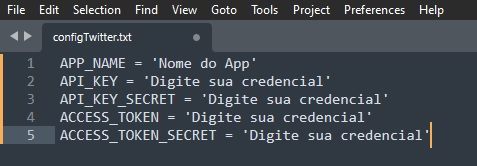

In [52]:
# Abrindo o arquivo com as credenciais de acesso.
with open('configTwitter.txt') as config:
    
    # Salvando as credenciais em variáveis.
    config = toml.loads(config.read())
    APP_NAME = config['APP_NAME']
    API_KEY = config['API_KEY']
    API_KEY_SECRET = config['API_KEY_SECRET']
    ACCESS_TOKEN = config['ACCESS_TOKEN']
    ACCESS_TOKEN_SECRET = config['ACCESS_TOKEN_SECRET']

Com todas as chaves e *tokens* configurados, precisamos fazer a autenticação na API do Twitter.

In [53]:
# Autenticação no Twitter.

# Autenticação do usuário.
auth = tw.OAuthHandler(API_KEY, API_KEY_SECRET)

# Autenticação dos tokens.
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# Autenticação na API.
api = tw.API(auth)

Com a autenticação na API realizada, podemos iniciar a coleta dos tweets.

Vamos iniciar definindo uma variável que receberá o termo que estamos buscando, no nosso caso "Black Friday".

Observe também que estamos utilizando *-filter:retweets* para filtrar os retweets, ou seja, os tweets repetidos.

In [54]:
# Definindo o termo de busca.
query_search = 'Black Friday'  + '-filter:retweets' 

Agora, utilizaremos a função *Cursor*, especificando alguns parâmetros:

- **api.search_tweets**: função para realizar a busca de tweets.
- **q**: refere-se a nossa variável que contém o termo a ser buscado.
- **lang**: especificamos que queremos apenas tweets em português.

A função *items* contém a quantidade de tweets coletados, no nosso caso, estamos coletando 500 tweets.

In [55]:
# Realizando a busca.
results = tw.Cursor(api.search_tweets, 
                    q = query_search, 
                    lang = 'pt').items(500)

In [56]:
# Salvando os tweets.
users = []
tweets = []
for tweet in results:
    users.append(tweet.user.name)
    tweets.append(tweet.text)

Pronto! A coleta já foi realizada!

Por fim, vamos salvar esse dataframe em um arquivo "csv".

In [57]:
# Convertendo em dataframe.
df_tweets = pd.DataFrame()
df_tweets['Users'] = users
df_tweets['Tweets'] = tweets

In [58]:
# Salvando os dados.
df_tweets.to_csv('twitterData.csv', index = False)

### 6.2 Tratando os Dados Coletados

Assim como fizemos com o conjunto de dados utilizado no treinamento do modelo, aqui, também precisaremos realizar o pré-processamento nos textos para organizar o *corpus* antes de iniciar a classificação.

Vamos iniciar carregando o arquivo "csv", que salvamos anteriormente.

In [59]:
# Carregando os dados.
twitter_df = pd.read_csv('twitterData.csv')
twitter_df.head()

,Users,Tweets
0,Quis custodiet ipsos custodes?,"@cahgyn @Ostralha Minha filha deve ter umas 30 LOL hahahahahahahaha\nEm minha defesa, compramos nos EUA na Black Friday a preço de banana"
1,𝟕🎮 PostoDeBocós 🇺🇦,@FreedomUnite_ @dovahkim123 Eu paguei 160 reais na Gold de um ano + Gamepass Ultimate 45 reais \nTotalizando deu 205… https://t.co/qBaNiKTxJt
2,amanda,@itamaracalixto meu último piercing pro nariz comprei na @ bijus_de_maria na black friday. as pratas de lá são tudoooorrrr
3,𝐦𝐚𝐭𝐡 #𝐦𝐨𝐦,@ellaisapunk na black friday geralmente abaixa bastante
4,bebe da rihanna,@everyatoms @starquebrilha Laura vc quer enganar QUEM se for assim vc fez uma compra milionária não tem um dia dess… https://t.co/Sp3rw0yHV3


Alguns dos tweets possuem links em suas mensagens, e isso precisa ser tratado antes de realizarmos a classificação. 

Para isso, iremos definir uma nova função.

In [60]:
# Criando a função.
def rm_spam(df, col):
    index_list = list()
    for i in range(df.shape[0]):
        match = re.search(r'\Shttp|\bhttp', df[col][i])
        if match:
            index_list.append(i)
        else:
            continue
    df_filtered = df.drop(index_list, axis = 0).reset_index(drop = True)
    return df_filtered

In [61]:
# Aplicando a função.
twitter_df = rm_spam(twitter_df, col = 'Tweets')

In [62]:
# Visualizando o dataframe.
twitter_df.head()

,Users,Tweets
0,Quis custodiet ipsos custodes?,"@cahgyn @Ostralha Minha filha deve ter umas 30 LOL hahahahahahahaha\nEm minha defesa, compramos nos EUA na Black Friday a preço de banana"
1,amanda,@itamaracalixto meu último piercing pro nariz comprei na @ bijus_de_maria na black friday. as pratas de lá são tudoooorrrr
2,𝐦𝐚𝐭𝐡 #𝐦𝐨𝐦,@ellaisapunk na black friday geralmente abaixa bastante
3,Júnior,@DaniloGentili 1° de abril agora é igual Black Friday? Vá vale na véspera?
4,gabrilly sousa,A útilma black friday que eu aproveitei foi a de chifre... quando eu pensei que tinha levado 1 era 5


In [63]:
# Dimensão do dataframe.
twitter_df.shape

(237, 2)

Observe que praticamente metade dos tweets foram excluídos.

Agora, podemos aplicar as mesmas funções que aplicamos aos dados de treino.

In [64]:
# Tratando os dados.

# Instanciando a classe.
dp = DataPrep()

# Aplicando as funções de limpeza e lematização.
corpus_twt = dp.rm_accents(twitter_df['Tweets'])
corpus_twt = dp.lemmatize(corpus_twt)

In [65]:
# Predição com as frases testes.
print('\nClassificação dos Tweets Reais:')
testes_vec = vectorizer.transform(corpus_twt)
for i in range(len(testes)):
    print('{} {:-<16} {}'.format([i+1], classifier_nb.predict(testes_vec)[i], twitter_df.iloc[i,1]))


Classificação dos Tweets Reais:
[1] Positivo-------- @cahgyn @Ostralha Minha filha deve ter umas 30 LOL hahahahahahahaha
Em minha defesa, compramos nos EUA na Black Friday a preço de banana
[2] Negativo-------- @itamaracalixto meu último piercing pro nariz comprei na @ bijus_de_maria na black friday. as pratas de lá são tudoooorrrr
[3] Negativo-------- @ellaisapunk na black friday geralmente abaixa bastante
[4] Negativo-------- @DaniloGentili 1° de abril agora é igual Black Friday? Vá vale na véspera?
[5] Negativo-------- A útilma black friday que eu aproveitei foi a de chifre... quando eu pensei que tinha levado 1 era 5


Vamos concatenar as previsões ao dataframe.

In [66]:
# Previsões do modelo.
testes_pred = classifier_nb.predict(testes_vec)
twitter_df['Predicted'] = testes_pred

In [67]:
# Probabilidades da classe "Positivo".
testes_probs = classifier_nb.predict_proba(testes_vec)  

twitter_df['Positive_Prob']  = 0
for i in range(twitter_df.shape[0]):
    twitter_df['Positive_Prob'].iloc[i] = testes_probs[i][1]

In [68]:
# Visualizando o dataframe.
twitter_df.head()

,Users,Tweets,Predicted,Positive_Prob
0,Quis custodiet ipsos custodes?,"@cahgyn @Ostralha Minha filha deve ter umas 30 LOL hahahahahahahaha\nEm minha defesa, compramos nos EUA na Black Friday a preço de banana",Positivo,0.501424
1,amanda,@itamaracalixto meu último piercing pro nariz comprei na @ bijus_de_maria na black friday. as pratas de lá são tudoooorrrr,Negativo,0.409029
2,𝐦𝐚𝐭𝐡 #𝐦𝐨𝐦,@ellaisapunk na black friday geralmente abaixa bastante,Negativo,0.248292
3,Júnior,@DaniloGentili 1° de abril agora é igual Black Friday? Vá vale na véspera?,Negativo,0.397810
4,gabrilly sousa,A útilma black friday que eu aproveitei foi a de chifre... quando eu pensei que tinha levado 1 era 5,Negativo,0.486283


Podemos observar na coluna **`Positive_Prob`** que o modelo teve dificuldades para classificar alguns tweets. 

Isso pode ter acontecido pelo simples fato de alguns tweets não expressarem uma opinião de forma clara. 

Para assegurar um melhor resultado, iremos considerar somente os casos em que as probabilidades foram maiores que 85% ou menores que 10%.

In [69]:
# Classificações mais assertivas.
selection = twitter_df[(twitter_df['Positive_Prob'] >= 0.85) | (twitter_df['Positive_Prob'] <= 0.10)].reset_index(drop = True)

In [70]:
# Visualizando o dataframe.
selection.head()

,Users,Tweets,Predicted,Positive_Prob
0,DIIH,"Essa semana começou parecendo Black Friday na Renner, tá de sacanagem 🤡🤯",Negativo,0.078337
1,marta morta,@LollapaloozaBr chama as haim e a rosalía aí na moralzinha \ne a rebecca black tb deixa a gata superar friday,Positivo,0.871289
2,Leticia,Eu amo q ainda tem metade dos livros q eu comprei na black friday pra ler,Positivo,0.856403
3,Said Silva Music,"Hoje o carinha chegou pra vender capa pra mim, 1 por 30 ou 2 por 50 eu falei: tenho 10 conto, ele disse: sorte sua que é Black Friday",Negativo,0.097124
4,Diego Alves,@souldemarte_ Eu só queria dinheiro pra comprar aquele box da Selena. Tô esperando novembro pra ver se entra na Black Friday,Negativo,0.095735


Agora sim, parece que as classificações fazem mais sentido. 

Vamos verificar a proporção das classificações.

In [71]:
# Contagem de registros.
selection['Predicted'].value_counts(normalize = True)

Negativo    0.6
Positivo    0.4
Name: Predicted, dtype: float64

## 7. Considerações Finais

O maior desafio desse projeto estava em não possuir um conjunto de dados pré-etiquetados para o treinamento do modelo. 

Por conta disso, utilizamos um conjunto com dados similares ao tema abordado.

Durante a fase de preparação dos dados, aplicamos técnicas amplamente utilizadas em PLN e que foram cruciais para o modelo consiguir interpretar as informações e realizar as classificações em um conjunto de dados relativamente diferente do que foi utilizado para seu treinamento.

Em relação ao desempenho do modelo treinado com o algoritmo *Naive Bayes*, conseguimos um resultado bastante satisfatório. 

Podemos perceber que para alguns tweets, o modelo teve maior dificuldade para realizar as classificações, e por esse motivo, consideramos apenas as classificações mais assertivas.

Apesar desse projeto ter uma complexidade de nível básico em PLN, poderíamos utilizar as mesmas abordagens vistas aqui para treinar um modelo capaz de classificar tweets referentes a qualquer tema, e assim, auxiliar as áreas de interesse a tomar as melhores decisões para a empresa.